# Chapter 12: Intro Geospatial - Vector

[JP Gannon](https://jpgannon.github.io/)
[](https://orcid.org/0000-0002-4595-3214)
([Virginia Tech](https://www.vt.edu/))  
2025-12-12

# Geospatial data in R - Vector

The following activity is available as a template github repository at
the following link:
<https://github.com/VT-Hydroinformatics/12-Intro_Geospatial_Vector>

For more: <https://datacarpentry.org/r-raster-vector-geospatial/>

Much of this is adapted from:
<https://geocompr.robinlovelace.net/index.html> Chapter 8

This demo uses data from the CAMELS dataset (full ref below)
<https://ral.ucar.edu/solutions/products/camels>

A. Newman; K. Sampson; M. P. Clark; A. Bock; R. J. Viger; D. Blodgett,
2014. A large-sample watershed-scale hydrometeorological dataset for the
contiguous USA. Boulder, CO: UCAR/NCAR.
<https://dx.doi.org/10.5065/D6MW2F4D>

In [ ]:
library(tidyverse)
library(sf)
library(tmap)      # for static and interactive maps
library(leaflet)   # for interactive maps
library(webshot2)  # for saving maps
library(htmltools) # for saving maps


theme_set(theme_classic())

## Goals

Our goals for this chapter are just to see some of the ways we can
wrangle and plot vector spatial data using R. This is by no means the
only way and is not an exhaustive demonstration of the packages loaded,
but it’ll get us started.

First, we need to define raster and vector spatial data.

Check out the images below for two examples of the same data represented
as raster data or vector data.

Vector: Points, lines, polygons, boundaries are crisp regardless of
scale Raster: Grid of same sized cells, vales in cells, cell size =
resolution (smaller cells, higher resolution)

![](attachment:images/raster%20vector1.png "Raster vs. Vector 1")

![](attachment:images/raster%20vector2.png "Raster vs. Vector 2")

**Questions from these two images:**

*What are the advantages/disadvantages of raster/vector for each?* Which
is best to show on a map for each?  \*For elevation, which would be
better for calculating slope? 

So, today we are sticking to vector data, but then we will be deal
primarily with raster elevation data.

## Intro to tmap

We are going to make maps mostly with tmap. But there are several other
options (ggplot, leaflet, etc).

Let’s look at how tmap works. It uses the same syntax as ggplot: the
grammar of graphics.

First we want to set tmap to static map mode. This is what we would want
if we were making maps for a manuscript or slides. You can also make
interactive maps with tmap, which we will show later. We will also set
the check.and.fix option in tmap_options to TRUE, we need to do this for
the data we are using, but it isn’t always necessary.

Second, we will read in our data. We’ll read in the “smallerws”
shapefile from the CAMELS dataset and another shapefile of the outline
of US states. To read in the shapefiles we will use st_read() from the
sf package.

Note that each of these shapefiles is in a separate folder and contains
several files. You must have all of those files for the shapefile to
work. \*yes: “A shapefile” is actually several files. Silly? Maybe. The
cause of much confusion when emailing someone “a shapefile”? Definitely.

Finally we will read in a csv called gauge information that has some
extra info we will join to the watershed shapefile later.

Once that is all done, we will look at the watershed data to see what is
available in the shapefile attribute table.

*What extra information does the data have beyond a regular R object?*
Play around with it, can you reference columns in the table the same way
you would with a regular object?
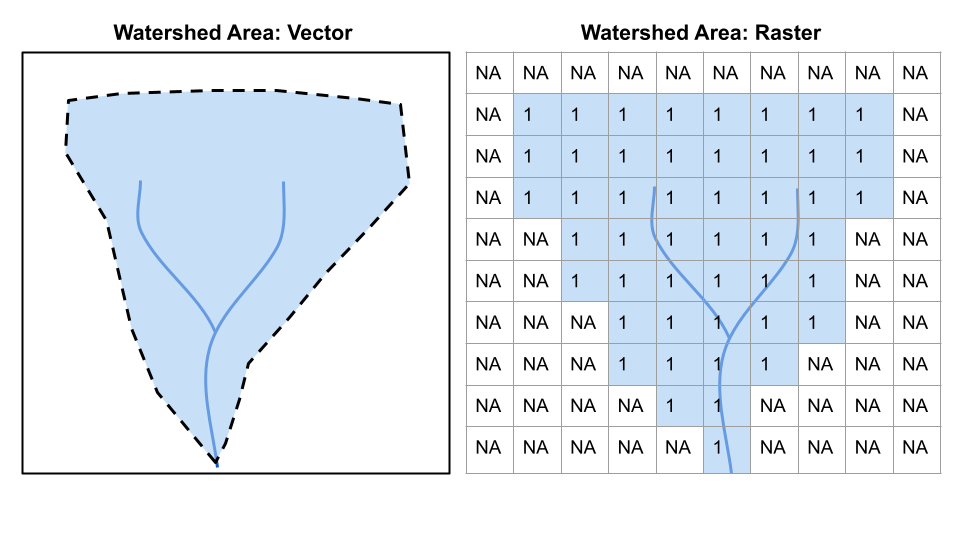
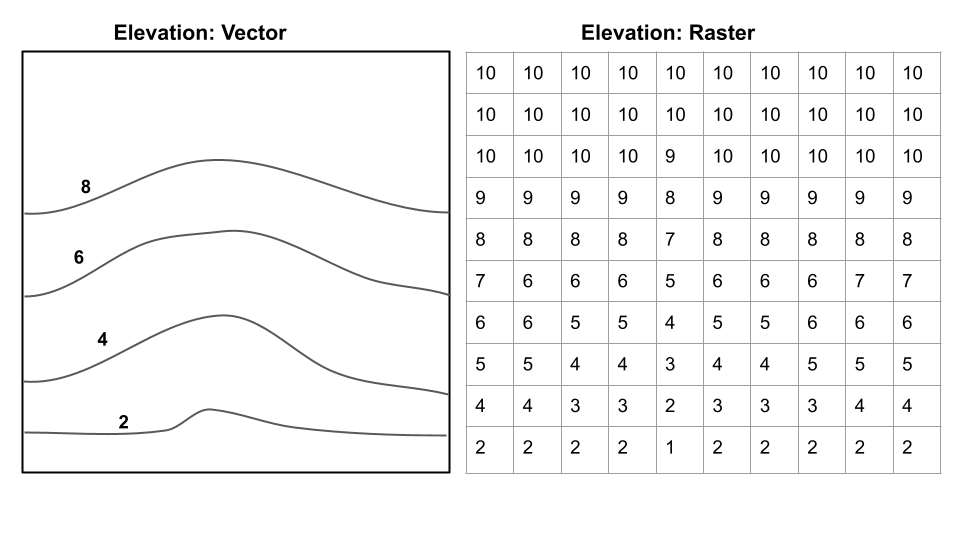

In [ ]:
#make sure tmap is in static map mode
tmap_mode("plot")

ℹ tmap modes "plot" - "view"
ℹ toggle with `tmap::ttm()`

In [ ]:
#the CAMELS shapefile throws an error about having 
#invalid polygons, this line allows it to plot
tm_check_fix()

[nothing to show] no data layers defined

Reading layer `smallerws' from data source 
  `C:\Users\AbnerBogan\Code\12-Intro_Geospatial_Vector\small_ws\smallerws.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 671 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -124.4377 ymin: 26.96621 xmax: -67.69059 ymax: 48.99931
Geodetic CRS:  +proj=longlat +datum=NAD83 +no_defs

In [ ]:
states <- st_read("cb_2018_us_state_20m/cb_2018_us_state_20m.shp")

Reading layer `cb_2018_us_state_20m' from data source 
  `C:\Users\AbnerBogan\Code\12-Intro_Geospatial_Vector\cb_2018_us_state_20m\cb_2018_us_state_20m.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 52 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -179.1743 ymin: 17.91377 xmax: 179.7739 ymax: 71.35256
Geodetic CRS:  NAD83

In [ ]:
gageinfo <- read_csv("gauge information.csv")

Rows: 672 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): HUC_02, GAGE_ID, GAGE_NAME
dbl (4): LAT, LONG, DRAINAGE_AREA_KM2, Elevation_m

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
#look at the watersheds shapefile data
head(watersheds)

Simple feature collection with 6 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -71.34071 ymin: 44.59213 xmax: -67.69059 ymax: 47.31557
Geodetic CRS:  +proj=longlat +datum=NAD83 +no_defs
   hru_id ann_P   lon_cen  lat_cen       AREA elev_mean ave_T july_T Perimeter
1 1013500     0 -68.56551 47.01169 2303988087  277.4935    NA     NA    647993
2 1022500     0 -68.07313 44.79691  620387273  103.6042    NA     NA    312624
3 1030500     0 -68.14985 45.80527 3676154745  174.4339    NA     NA    662248
4 1031500     0 -69.58119 45.23568  766544703  304.7435    NA     NA    309614
5 1047000     0 -70.16213 44.98744  904956194  379.7800    NA     NA    310157
6 1052500     0 -71.17197 44.96168  396110305  646.0736    NA     NA    172588
                        geometry
1 MULTIPOLYGON (((-68.06259 4...
2 MULTIPOLYGON (((-67.97836 4...
3 MULTIPOLYGON (((-68.09162 4...
4 MULTIPOLYGON (((-69.31629 4...
5 MULTIPOLYGON (((-70.10847 4...
6 MULTIPOLYGON (((-7

Let’s make a map showing the watersheds data. Each watershed has
coordinates to draw it in the dataset, and tmap knows how to deal with
that. It uses the same format as ggplot, but instead of ggplot() you
will use tm_shape(). Then the geoms are prefixed tm\_, so we will use
tm_fill to show a map of the watersheds filled in with a color.

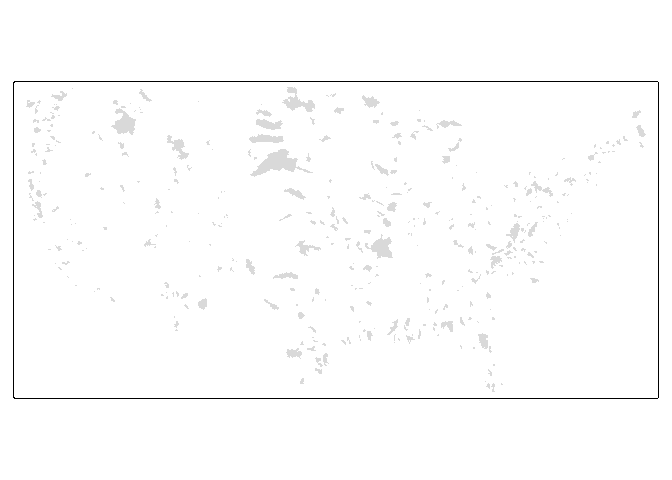

In [ ]:
# Pass the watershed data to tmap and fill the polygons 
tm_shape(watersheds) +
  tm_fill()

If we use tm_borders instead, it will just outline the watersheds.

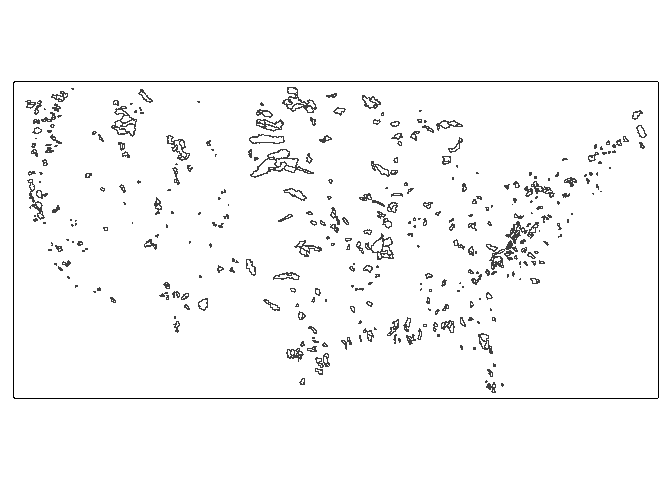

In [ ]:
# Add border layer to shape
tm_shape(watersheds) +
  tm_borders()

That’s fun, and maybe you can guess what country we are in based on the
distribution of watersheds, but it would be better to show some
geopolitical boundaries to get a sense of where we are.

To do this, we will use a second tm_shape and show the states data we
read in on the plot as well. Just like in ggplot, you can use multiple
tm\_ functions to show multiple datsets on the same map.

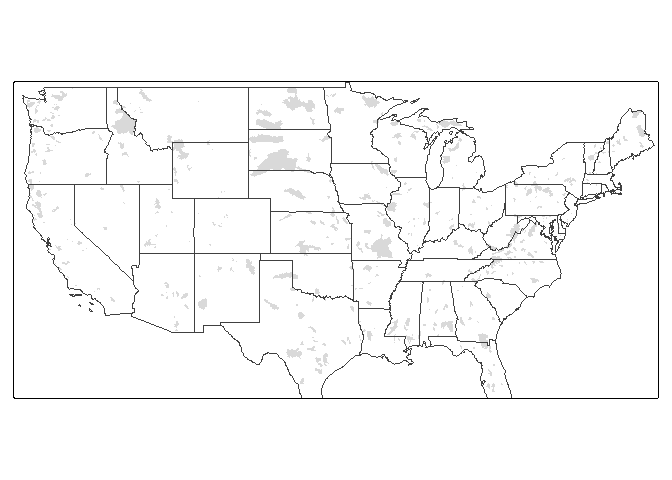

In [ ]:
# Add border layer to shape
tm_shape(watersheds) +
  tm_fill() +
  tm_shape(states)+
  tm_borders()

You can also show the SAME data with multiple geoms. Let’s add
tm_borders under the watershed portion of the map and before the states
portion so we get fill and borders on out watersheds.

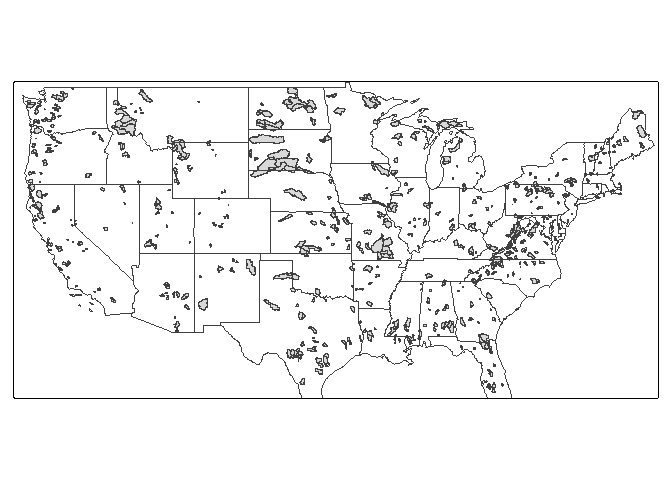

In [ ]:
# Add fill and border layers to shape
tm_shape(watersheds) +
  tm_fill() +
  tm_borders()+
  tm_shape(states)+
  tm_borders()

Okay, this is starting to look like a map! But we need to add elements
to make it better.

We could do this all in one statement, but you can also save your
existing map as a kind of “basemap” and then add to it later, just like
with a ggplot object. We will save the above map as *usa*.

Then we can use several built in geometries in tmap to add a compass,
scale, and title. Note the syntax for specifying the position of the
objects. Again, you could do this all in one statement too if you
wanted.

! `tm_scale_bar()` is deprecated. Please use `tm_scalebar()` instead.
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`

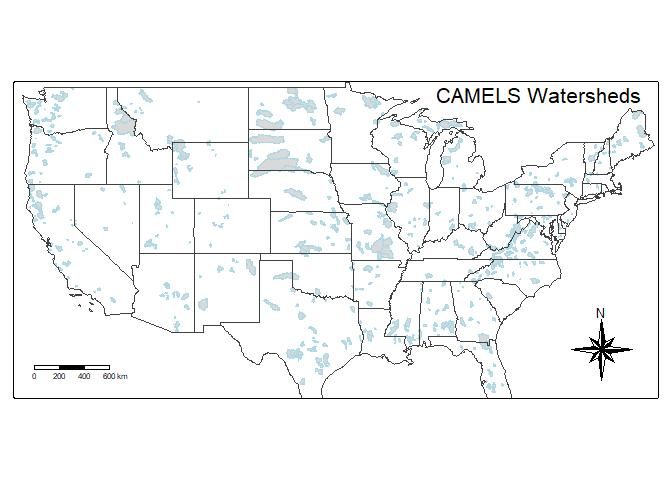

In [ ]:
#Save basic map object as "usa"
usa <- tm_shape(watersheds) +
  tm_fill(col = "lightblue")+
  tm_shape(states)+
  tm_borders()
   
usa + 
  tm_compass(type = "8star", position = c("right", "bottom")) +
  tm_scale_bar(position = c("left", "bottom"))+
  tm_layout(title = "CAMELS Watersheds", title.position = c("right", "TOP"))

Below is an example of how to edit the “symbology” of the map. In other
words, we want to color each of the polygons depending on a variable.
Here we make the watersheds darker blue if they have a higher elevation.

The syntax below is basically (pseudo code):

> Represent watersheds as shapes +  
> color the shapes based on elev_mean, use 10 colors, use the Blues
> palette  
> add a legend in the bottom right, add some space for the title, define
> the title, position the title  
> add a compass at the bottom left  
> add a scale bar at the bottom left

── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_tm_polygons()`: migrate the argument(s) related to the scale of
the visual variable `fill` namely 'n', 'palette' (rename to 'values') to
fill.scale = tm_scale(<HERE>).
[v3->v4] `tm_polygons()`: use 'fill' for the fill color of polygons/symbols
(instead of 'col'), and 'col' for the outlines (instead of 'border.col').
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
! `tm_scale_bar()` is deprecated. Please use `tm_scalebar()` instead.
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Blues" is named
"brewer.blues"
Multiple palettes called "blues" found: "brewer.blues", "matplotlib.blues". The first one, "brewer.blues", is returned.

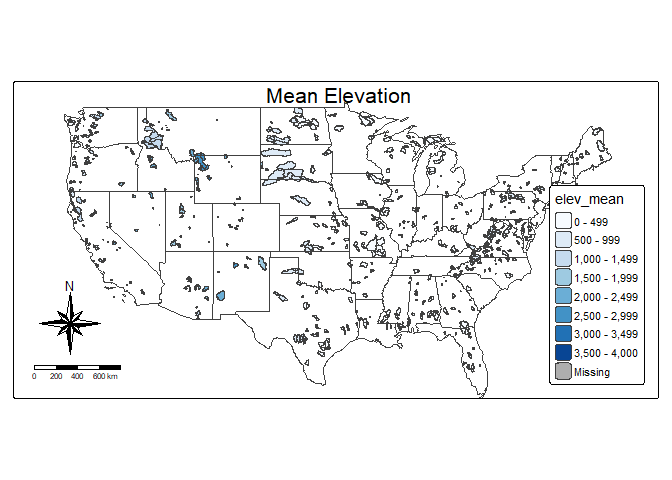

In [ ]:
tm_shape(watersheds) + 
  tm_fill(col = "elev_mean", n = 10, palette = "Blues")+
  tm_borders(lwd = 0.2)+
  tm_shape(states)+
  tm_borders()+
  tm_layout(legend.position = c("right", "bottom"), 
            inner.margins = 0.1,
            title = "Mean Elevation", 
            title.position = c("center", "TOP"))+
  tm_compass(type = "8star", position = c("left", "bottom")) +
  tm_scale_bar(position = c("left", "bottom"))

## Data wrangling with tidyverse principles

You can use the same techniques as with other data to change or filter
the spatial data. Below we filter to show just watershed number 3164000,
which will be in quotes because the column is a character datatype. Note
when we looked at the watersheds object above there is a column called
hru_id for the watershed ids.

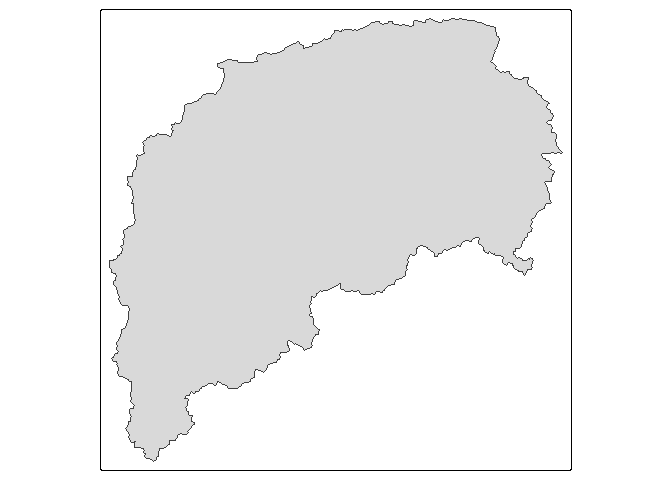

In [ ]:
watersheds |> filter(hru_id == "3164000") |>
  tm_shape() +
  tm_fill() +
  tm_borders() 

## Add non-spatial data to spatial data with a join

We have been using the watersheds shapefile. The other dataset we read
in “gageinfo” has more data, but it is just a regular tibble, not a
geospatial file.

We need to attach data from gageinfo object to the watersheds geospatial
object based on watershed ID. How in the world will we do that?

A JOIN!!

In the watersheds shapefile the watershed ids are in a column called
*hru_id* and in gageinfo tibble they are in a column called *GAGE_ID*.
So when we do the join, we need to tell R that these columns are the
same and we want to use them to match the values. We will do a left join
to accomplish this.

BUT. TWIST!

Let’s look at the first value in hru_id in watersheds: “1013500” Now the
same one in GAGE_ID in gageinfo: “01013500”

They’re both the same IDs, but one has a leading zero. And because they
are character format, “1013500” does not equal “01013500”. We can
address this a couple of ways, but the best is probably to keep them as
characters, but add a leading 0 to the hru_id column.

We will do this by creating a new column with a mutate and using the
paste0() function to add a leading 0. To make the join easier, we will
also give this new column the same name as in the gageinfo tibble:
“GAGE_ID”.

To review joins, check out chapter @ref(getdata)

In [ ]:
#add leading 0 to hru_id column and save it as GAGE_ID
watersheds <- watersheds |>
  mutate(GAGE_ID = paste0("0", hru_id))

#join watersheds and gageinfo using the GAGE_ID column as the key
watersheds_info <- watersheds |>
  left_join(gageinfo, by = "GAGE_ID")

head(watersheds_info)

Simple feature collection with 6 features and 16 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -71.34071 ymin: 44.59213 xmax: -67.69059 ymax: 47.31557
Geodetic CRS:  +proj=longlat +datum=NAD83 +no_defs
   hru_id ann_P   lon_cen  lat_cen       AREA elev_mean ave_T july_T Perimeter
1 1013500     0 -68.56551 47.01169 2303988087  277.4935    NA     NA    647993
2 1022500     0 -68.07313 44.79691  620387273  103.6042    NA     NA    312624
3 1030500     0 -68.14985 45.80527 3676154745  174.4339    NA     NA    662248
4 1031500     0 -69.58119 45.23568  766544703  304.7435    NA     NA    309614
5 1047000     0 -70.16213 44.98744  904956194  379.7800    NA     NA    310157
6 1052500     0 -71.17197 44.96168  396110305  646.0736    NA     NA    172588
   GAGE_ID HUC_02                                    GAGE_NAME      LAT
1 01013500     01             Fish River near Fort Kent, Maine 47.23739
2 01022500     01      Narraguagus River at Cherryfield, Maine 44.60797
3

And now we can plot this formerly non-spatial data on our map.

In this case, we can now add the name of the watershed to the map rather
than the number.

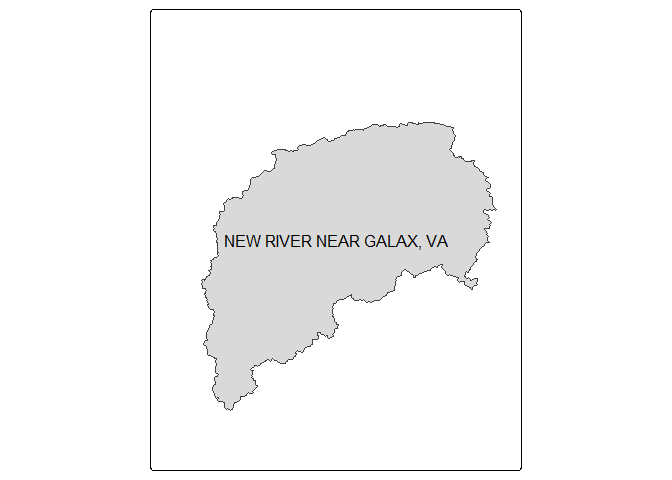

In [ ]:
#now the gageinfo columns are available for us to use when mapping
watersheds_info |> filter(hru_id == "3164000") |>
  tm_shape() +
  tm_fill() +
  tm_borders() +
  tm_text("GAGE_NAME", size = 1) 

We can also subset vector data to create new datasets or plot. Below we
will use filter statements to grab all the polygons in Virginia from the
watersheds shapefile and then the Virginia state outline from the states
shapefile.

The method we will use for getting the Virginia watersheds is a little
new. We are going to use the grepl() function to grab any gages that
include the text “, VA” since there isn’t a state column, but the
watershed names include the state.

Why are we doing “, VA” and not just “VA”? Good question!

“, VA” will most likely only show up in gage names that are in Virginia
because they’ll be in the format “Gage name, VA”. If we just say “VA” we
might get some gages that have “VA” as part of their name but are not in
Virginia.

Once we successfully filter to Virginia, we will then make a nice map of
the CAMELS watersheds in Virginia!

[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
! `tm_scale_bar()` is deprecated. Please use `tm_scalebar()` instead.

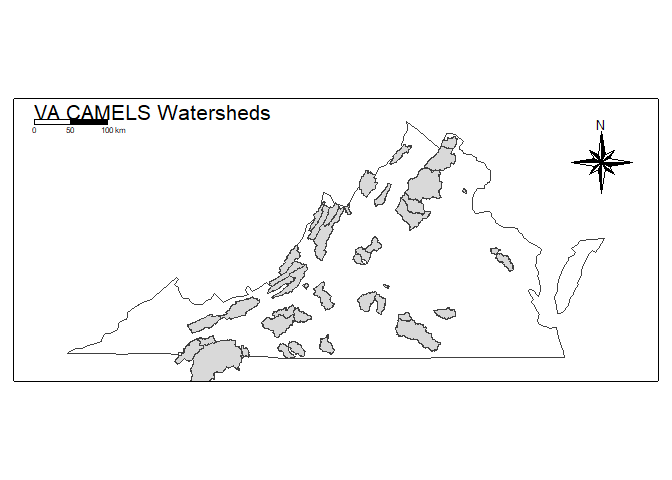

In [ ]:
va_watersheds <- filter(watersheds_info, grepl(", VA", GAGE_NAME))
va_outline <- filter(states, NAME == "Virginia")

va_outline |>
  tm_shape() +
  tm_borders() + 
  tm_shape(va_watersheds) +
  tm_fill() +
  tm_borders() +
  tm_layout(inner.margins = 0.1,
            title = "VA CAMELS Watersheds", 
            title.position = c("left", "TOP"))+
  tm_compass(type = "8star", position = c("right", "top")) +
  tm_scale_bar(position = c("left", "top"))

In addition to filtering, we can use the data in the attribute table to
calculate additional parameters, just like with a normal object. Below
we calculate the ratio of Area to Perimeter by changing the perimeter
datatype to numeric and then dividing area by perimeter.

In [ ]:
va_watersheds <- va_watersheds |> 
  mutate(PerimeterNum = as.numeric(Perimeter),
         Area_Perimeter = AREA / PerimeterNum) 

head(va_watersheds)

Simple feature collection with 6 features and 18 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -79.32293 ymin: 38.31301 xmax: -77.55629 ymax: 39.2801
Geodetic CRS:  +proj=longlat +datum=NAD83 +no_defs
   hru_id ann_P   lon_cen  lat_cen      AREA elev_mean ave_T july_T Perimeter
1 1620500     0 -79.27321 38.37592  61339485  913.1406    NA     NA     69535
2 1632000     0 -78.96078 38.70073 547286614  605.6940    NA     NA    175812
3 1632900     0 -78.72713 38.54450 249206633  410.4016    NA     NA    134796
4 1634500     0 -78.44939 39.06919 264494917  441.7808    NA     NA    151377
5 1638480     0 -77.67379 39.20060 233835164  175.1224    NA     NA    112488
6 1644000     0 -77.80391 38.99276 859599217  187.0871    NA     NA    237588
   GAGE_ID HUC_02                                GAGE_NAME      LAT      LONG
1 01620500     02         NORTH RIVER NEAR STOKESVILLE, VA 38.33763 -79.24004
2 01632000     02 N F SHENANDOAH RIVER AT COOTES STORE, VA 38.63706 -

Now we can plot our newly calculated data by controlling color with that
new column name.

── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_tm_polygons()`: migrate the argument(s) related to the scale of
the visual variable `fill` namely 'n', 'palette' (rename to 'values') to
fill.scale = tm_scale(<HERE>).
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
! `tm_scale_bar()` is deprecated. Please use `tm_scalebar()` instead.
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

[plot mode] fit legend/component: Some legend items or map compoments do not
fit well, and are therefore rescaled.
ℹ Set the tmap option `component.autoscale = FALSE` to disable rescaling.

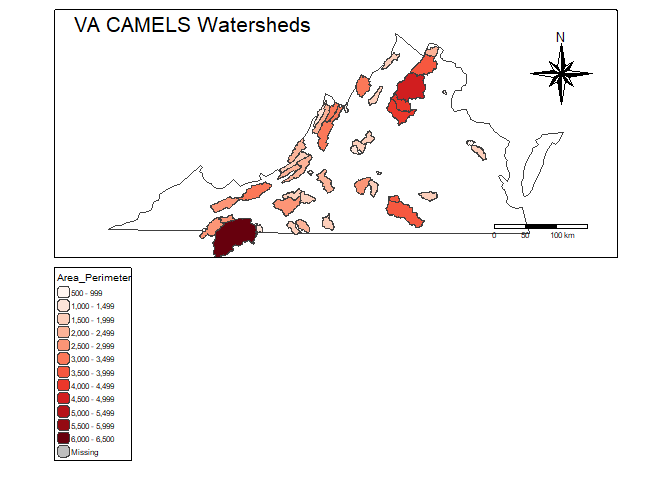

In [ ]:
va_outline |>
  tm_shape() +
  tm_borders() + 
  tm_shape(va_watersheds) +
  tm_fill(col = "Area_Perimeter", n = 10, palette = "Reds") +
  tm_borders()+
  tm_layout(inner.margins = 0.12,
            title = "VA CAMELS Watersheds", 
            title.position = c("left", "TOP"))+
  tm_compass(type = "8star", position = c("right", "top")) +
  tm_scale_bar(position = c("right", "bottom"))

## Plot maps side by side

Just like we can use facets in ggplot, we can use facets to show
multiple maps. Below we color our map by AREA and elev_mean and put them
next to each other using tm_facets.

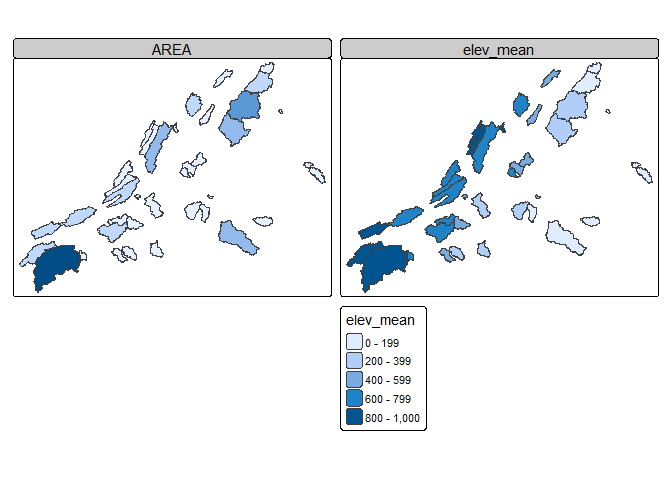

In [ ]:
facets = c("AREA", "elev_mean")

tm_shape(va_watersheds) + 
  tm_polygons(facets) + 
  tm_facets(ncol = 2, sync = FALSE)

## Built in styles, like themes in ggplot

Tmap also has built in styles, which are like themes in ggplot. We can
use these styles with tm_style. Try “classic”, “cobalt”, or “col_blind”
below.

── tmap v3 code detected ───────────────────────────────────────────────────────

[v3->v4] `tm_tm_polygons()`: migrate the argument(s) related to the scale of
the visual variable `fill` namely 'n', 'palette' (rename to 'values') to
fill.scale = tm_scale(<HERE>).
[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`
! `tm_scale_bar()` is deprecated. Please use `tm_scalebar()` instead.
[cols4all] color palettes: use palettes from the R package cols4all. Run
`cols4all::c4a_gui()` to explore them. The old palette name "Reds" is named
"brewer.reds"
Multiple palettes called "reds" found: "brewer.reds", "matplotlib.reds". The first one, "brewer.reds", is returned.

[plot mode] fit legend/component: Some legend items or map compoments do not
fit well, and are therefore rescaled.
ℹ Set the tmap option `component.autoscale = FALSE` to disable rescaling.

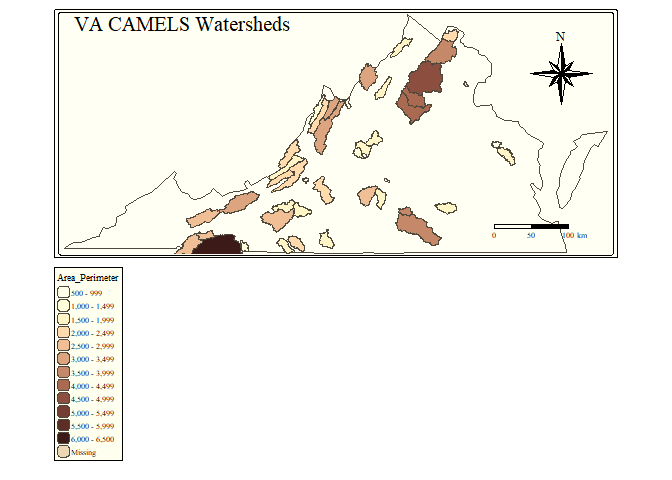

In [ ]:
va_outline |>
  tm_shape() +
  tm_borders() + 
  tm_shape(va_watersheds) +
  tm_fill(col = "Area_Perimeter", n = 10, palette = "Reds") +
  tm_borders()+
  tm_layout(inner.margins = 0.12,
            title = "VA CAMELS Watersheds", 
            title.position = c("left", "TOP"))+
  tm_compass(type = "8star", position = c("right", "top")) +
  tm_scale_bar(position = c("right", "bottom"))+
  tm_style("classic") #try cobalt, bw, col_blind

## Interactive Maps

### tmap

You can also generate maps that you can interact with, as opposed to
static maps, that we have been using before. If you are generating a map
for an app or webpage, this may be a good choice. But for a pdf report,
the static maps are more appropriate.

In tmap all you have to do is run tmap_mode(“view”) and it will create
an interactive map with the exact same syntax! To switch back to a
static map, run tmap_mode(“plot”)

Also in this chunk we see how to add a basemap to a tmap object, using
tm_basemap.

ℹ tmap modes "plot" - "view"


── tmap v3 code detected ───────────────────────────────────────────────────────
[v3->v4] `tm_polygons()`: use `fill_alpha` instead of `alpha`.[v3->v4] `tm_layout()`: use `tm_title()` instead of `tm_layout(title = )`

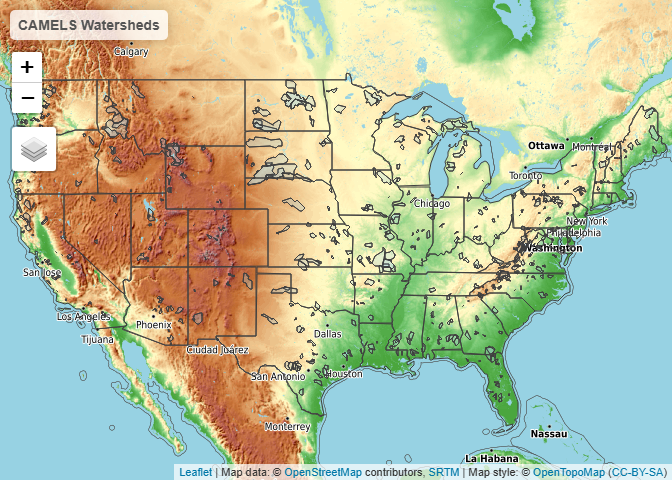

In [ ]:
tmap_mode("view")

### Leaflet

Leaflet is another way to make interactive maps. It’s syntax is very
different, as you can see below. But depending on what functionality you
need, it could be a better choice.

Need '+proj=longlat +datum=WGS84'

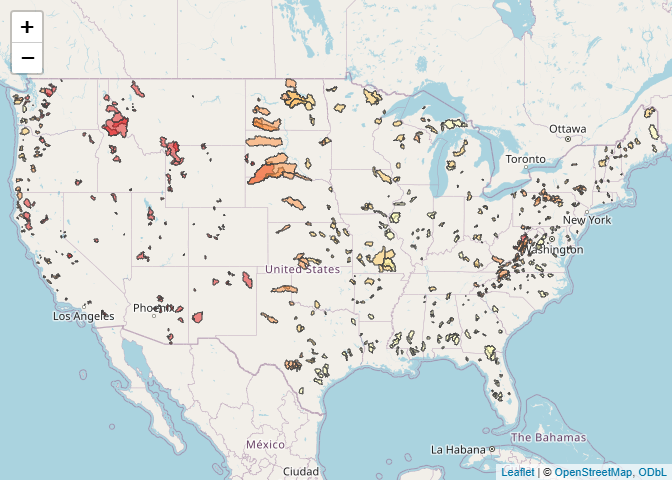

In [ ]:
leaflet(watersheds_info) |> 
  addTiles() |>
  addPolygons(color = "#444444", weight = 1, smoothFactor = 0.5,
    opacity = 1.0, fillOpacity = 0.5,
    fillColor = ~colorQuantile("YlOrRd", elev_mean)(elev_mean))